<a href="https://colab.research.google.com/github/RakshayGO/Public-Sentiment-Analysis/blob/main/SOP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install flair
!pip install regex
!pip install yfinance

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import requests
import flair
import regex as re
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAANOZaQEAAAAAecNGePa046%2F1HnlYNiL8AyX%2BPmQ%3DM5bj9CUoqEosPqZtkeipKXZM3aAgrslNbcndr3nctoYGMK113f'

In [ ]:
import yfinance as yf

In [ ]:
def get_dataV2(tweet):
    data = {
        'id': tweet['id'],
        'created_at': tweet['created_at'],
        'text': tweet['text']
    }
    return data

In [ ]:
endpoint = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'authorization': f'Bearer {BEARER_TOKEN}'}
params = {
    'query': '(zomato) (lang:en) (-is:retweet)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang'
}

dtformat = '%Y-%m-%dT%H:%M:%SZ'

In [ ]:
def time_travel(now, mins):
    now = datetime.strptime(now, dtformat)
    # now = datetime.utcnow()

    back_in_time = now - timedelta(minutes=mins)
    return back_in_time.strftime(dtformat)
    
# now = datetime.now() - timedelta(seconds=15)  # get the current datetime, this is our starting point
# last_week = now - timedelta(days=7)  # datetime one week ago = the finish line
# now = now.strftime(dtformat)

In [ ]:
df = pd.DataFrame()  
now = datetime.utcnow()
# now = datetime.strptime(now, dtformat)

now = now - timedelta(seconds=15)
endtime = now
last_week = now - timedelta(days=5)
now = now.strftime(dtformat)


while True:
    if datetime.strptime(now, dtformat) < last_week:

        break
    pre60 = time_travel(now, 60)  # get 60 minutes before 'now'

    params['start_time'] = pre60
    params['end_time'] = now
    response = requests.get(endpoint,
                            params=params,
                            headers=headers)  
    now = pre60  # move the window 60 minutes earlier
    # print(now)

    for tweet in response.json()['data']:
        row = get_dataV2(tweet)
        df = df.append(row, ignore_index=True)

In [ ]:
df.head()

,id,created_at,text
0,1505485421958266881,2022-03-20T10:04:29.000Z,Biased #Zomato @zomatocare decided to cancel...
1,1505484353823903744,2022-03-20T10:00:15.000Z,@Sriramnaiduuuu @Tech_glareOffl Inconvenience ...
2,1505484272093736965,2022-03-20T09:59:55.000Z,Saw this happen infront of my office. a Zoma...
3,1505484108642029568,2022-03-20T09:59:16.000Z,Order ID: 3869089054\n\nOrdered a Crispy Chick...
4,1505483733037584385,2022-03-20T09:57:47.000Z,@SwiggyCares @zomato do you have clarification...


In [ ]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')
probs = []
sentiments = []

2022-03-20 10:06:11,130 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
for tweet in df['text'].to_list():
    
    sentence = flair.data.Sentence(tweet)
    sentiment_model.predict(sentence)
   
    probs.append(sentence.labels[0].score)
    sentiments.append(sentence.labels[0].value) 

In [ ]:
df['probability'] = probs
df['sentiment'] = sentiments

In [ ]:
df.head(15)

,id,created_at,text,probability,sentiment
0,1505485421958266881,2022-03-20T10:04:29.000Z,Biased #Zomato @zomatocare decided to cancel...,0.999915,NEGATIVE
1,1505484353823903744,2022-03-20T10:00:15.000Z,@Sriramnaiduuuu @Tech_glareOffl Inconvenience ...,0.999984,NEGATIVE
2,1505484272093736965,2022-03-20T09:59:55.000Z,Saw this happen infront of my office. a Zoma...,0.884228,POSITIVE
3,1505484108642029568,2022-03-20T09:59:16.000Z,Order ID: 3869089054\n\nOrdered a Crispy Chick...,0.999964,NEGATIVE
4,1505483733037584385,2022-03-20T09:57:47.000Z,@SwiggyCares @zomato do you have clarification...,0.993202,NEGATIVE
5,1505483571795935240,2022-03-20T09:57:08.000Z,"@kingslyj @zomato So hold the stocks mfs, this...",0.836249,POSITIVE
6,1505483449536331776,2022-03-20T09:56:39.000Z,@zomatocare Last time we tweeted for same reas...,0.999570,NEGATIVE
7,1505483422063820801,2022-03-20T09:56:33.000Z,"After delivering garbage food , now @zomato is...",0.998622,NEGATIVE
8,1505482904452796417,2022-03-20T09:54:29.000Z,@kingslyj @zomato The end goal of EVERY indian...,0.997985,NEGATIVE
9,1505482616849715200,2022-03-20T09:53:21.000Z,Almost every delivery driver of both @zomato &...,0.913696,NEGATIVE


In [ ]:
zomato = yf.Ticker("ZOMATO.NS")
zomato_stock = zomato.history(
    start=last_week,
    end= endtime,
    interval='60m'
).reset_index()

In [ ]:
df2 = pd.DataFrame(zomato_stock)
df2['Close']

0     76.150002
1     76.849998
2     76.650002
3     75.949997
4     76.199997
5     75.849998
6     76.000000
7     78.699997
8     78.800003
9     78.849998
10    78.699997
11    78.750000
12    81.500000
13    80.849998
Name: Close, dtype: float64

In [ ]:
df3 = df

In [ ]:
df3.drop(['id', 'text' ], axis = 1)

,created_at,probability,sentiment
0,2022-03-20T10:04:29.000Z,0.999915,NEGATIVE
1,2022-03-20T10:00:15.000Z,0.999984,NEGATIVE
2,2022-03-20T09:59:55.000Z,0.884228,POSITIVE
3,2022-03-20T09:59:16.000Z,0.999964,NEGATIVE
4,2022-03-20T09:57:47.000Z,0.993202,NEGATIVE
...,...,...,...
5418,2022-03-15T10:10:38.000Z,0.961042,NEGATIVE
5419,2022-03-15T10:10:13.000Z,0.757641,NEGATIVE
5420,2022-03-15T10:09:42.000Z,0.612831,POSITIVE
5421,2022-03-15T10:06:19.000Z,0.999993,NEGATIVE


In [ ]:
score = []
for ind in df3.index:
  if df3['sentiment'][ind] == 'NEGATIVE':
    score.append(df3['probability'][ind]*-1) 
  else:
    score.append(df3['probability'][ind])

In [ ]:
range_stock_price = max(df2['Close']) - min(df2['Close'])
range_stock_price
mean_stock_price = df2['Close'].mean()

In [ ]:
mean_score = sum(score)/len(score)
range_score = max(score) - min (score)
score_normalised = []
for item in score:
  score_normalised.append(((item - mean_score)/range_score)*range_stock_price*0.5 + mean_stock_price) #centered at mean and accentuated according to the range of stock variation



In [ ]:
mean_score

-0.5272465081380211

In [ ]:
df3['normalised_score'] = score_normalised

In [ ]:
df3['normalised_score'].mean()

77.8428562709262

In [ ]:
df3.head(20)

,id,created_at,text,probability,sentiment,normalised_score
0,1505485421958266881,2022-03-20T10:04:29.000Z,Biased #Zomato @zomatocare decided to cancel...,0.999915,NEGATIVE,77.175185
1,1505484353823903744,2022-03-20T10:00:15.000Z,@Sriramnaiduuuu @Tech_glareOffl Inconvenience ...,0.999984,NEGATIVE,77.175088
2,1505484272093736965,2022-03-20T09:59:55.000Z,Saw this happen infront of my office. a Zoma...,0.884228,POSITIVE,79.836643
3,1505484108642029568,2022-03-20T09:59:16.000Z,Order ID: 3869089054\n\nOrdered a Crispy Chick...,0.999964,NEGATIVE,77.175116
4,1505483733037584385,2022-03-20T09:57:47.000Z,@SwiggyCares @zomato do you have clarification...,0.993202,NEGATIVE,77.184669
5,1505483571795935240,2022-03-20T09:57:08.000Z,"@kingslyj @zomato So hold the stocks mfs, this...",0.836249,POSITIVE,79.768869
6,1505483449536331776,2022-03-20T09:56:39.000Z,@zomatocare Last time we tweeted for same reas...,0.999570,NEGATIVE,77.175673
7,1505483422063820801,2022-03-20T09:56:33.000Z,"After delivering garbage food , now @zomato is...",0.998622,NEGATIVE,77.177012
8,1505482904452796417,2022-03-20T09:54:29.000Z,@kingslyj @zomato The end goal of EVERY indian...,0.997985,NEGATIVE,77.177912
9,1505482616849715200,2022-03-20T09:53:21.000Z,Almost every delivery driver of both @zomato &...,0.913696,NEGATIVE,77.296975


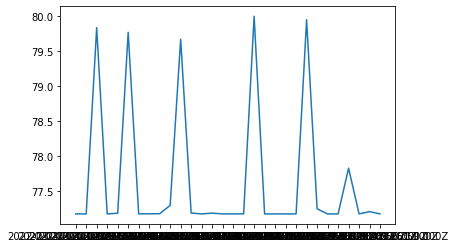

In [ ]:
plt.plot(df3['created_at'].head(30), df3['normalised_score'].head(30))
plt.show()